# Plotting datasets

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
!wget -O benchmark.tsv https://www.dropbox.com/s/jkflna9nvumum1v/benchmark_set.tsv?dl=0
!wget -O training.tsv https://www.dropbox.com/s/k145z0yty08oa33/training_set.tsv?dl=0
! gdown --id 1vtwDf1VUcv7vPhch8kN3j5DnzQ7hnk2M

### SP lenght distribution
First i will filter the files to take only entries with the signal peptide.

In [ ]:
! grep -v "NO_SP" training.tsv | wc

    259    2648   40855


In [ ]:
! grep -v "NO_SP" training.tsv > training_SP.tsv
! grep -v "NO_SP" benchmark.tsv > benchmark_SP.tsv

Now i will create a pandas dataframe to count the lenghts of the SPs

In [ ]:
training_df = pd.read_table("training_SP.tsv")
training_df.head()

,UniProtKB accession,Taxa,Kingdom,Class,Cross-validation fold,Sequence (first 50 N-terminal residues),SP cleavage-site annotation
0,P61916,Homo sapiens (Human),Metazoa,SP,0,MRFLAATFLLLALSTAAQAEPVQFKDCGSVDGVIKEVNVSPCPTQP...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1,Q7M3V1,Chelonus sp. nr. curvimaculatus (Parasitic wasp),Metazoa,SP,0,MAGKEVIFIMALFIAVESSPIFSFDDLVCPSVTSLRVNVEKNECST...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...
2,Q08738,Bombyx mori (Silk moth),Metazoa,SP,0,MRVFLAICLSLTVALAAETGKYTPFQYNRVYSTVSPFVYKPGRYVA...,SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3,Q41350,Solanum lycopersicum (Tomato) (Lycopersicon es...,Plants,SP,0,MASSSAKILLPLSLLFTLLSLSQSTNPNFILTLVNNCPYTIWPAIQ...,SSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNN...
4,Q86SE1,Androctonus amoreuxi (African fattail scorpion...,Metazoa,SP,0,MNYLVMISLALLLMIGVESVRDGYIVYPHNCVYHCIPSCDGLCKEN...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...


In [ ]:
benchmark_df = pd.read_table("benchmark_SP.tsv")
benchmark_df.head()

,UniProtKB accession,Taxa,Kingdom,Class,Sequence (first 50 N-terminal residues),SP cleavage-site annotation
0,A1X158,Rattus norvegicus (Rat),Metazoa,SP,MARNMNILTLFAVLIGSASAVYHPPSWTAWIAPKPWTAWKVHPPAW...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...
1,D3Z9M3,Rattus norvegicus (Rat),Metazoa,SP,MLVILLMVVVLALSSAQDPNRDFVVSSQDVRERQPSSQQGTVGGQS...,SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
2,P42264,Patiria pectinifera (Starfish) (Asterina pecti...,Metazoa,SP,MTAPWRRLRSLVWEYWAGFLVCAFWIPDSRGMPHVIRIGGIFEYAD...,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNN...
3,C9K4X8,Aspergillus oryzae (strain ATCC 42149 / RIB 40...,Fungi,SP,MTSNNRHLFQATCLVLLLLHAAFHGGALGEKYCDDDFHMAVFRTCA...,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNN...
4,Q2U4L7,Homo sapiens (Human),Metazoa,SP,MMHFLSFCLSVASLVSYAGAASTFSPARPPALPLAVKSPYLSTWLS...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...


In [ ]:
lenghts_tr = []
for sp in training_df['SP cleavage-site annotation']:
    leng = 0
    for char in sp:
        if char == "S":
            leng += 1
    lenghts_tr.append(leng)

In [ ]:
training_df["lenghts"] = lenghts_tr

In [ ]:
training_df.head()

,UniProtKB accession,Taxa,Kingdom,Class,Cross-validation fold,Sequence (first 50 N-terminal residues),SP cleavage-site annotation,lenghts
0,P61916,Homo sapiens (Human),Metazoa,SP,0,MRFLAATFLLLALSTAAQAEPVQFKDCGSVDGVIKEVNVSPCPTQP...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...,19
1,Q7M3V1,Chelonus sp. nr. curvimaculatus (Parasitic wasp),Metazoa,SP,0,MAGKEVIFIMALFIAVESSPIFSFDDLVCPSVTSLRVNVEKNECST...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...,20
2,Q08738,Bombyx mori (Silk moth),Metazoa,SP,0,MRVFLAICLSLTVALAAETGKYTPFQYNRVYSTVSPFVYKPGRYVA...,SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,16
3,Q41350,Solanum lycopersicum (Tomato) (Lycopersicon es...,Plants,SP,0,MASSSAKILLPLSLLFTLLSLSQSTNPNFILTLVNNCPYTIWPAIQ...,SSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNN...,24
4,Q86SE1,Androctonus amoreuxi (African fattail scorpion...,Metazoa,SP,0,MNYLVMISLALLLMIGVESVRDGYIVYPHNCVYHCIPSCDGLCKEN...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...,19


In [ ]:
lenghts_bh = []
for sp in benchmark_df['SP cleavage-site annotation']:
    leng = 0
    for char in sp:
        if char == "S":
            leng += 1
    lenghts_bh.append(leng)

In [ ]:
benchmark_df["lenghts"] = lenghts_bh

In [ ]:
benchmark_df.head()

,UniProtKB accession,Taxa,Kingdom,Class,Sequence (first 50 N-terminal residues),SP cleavage-site annotation,lenghts
0,A1X158,Rattus norvegicus (Rat),Metazoa,SP,MARNMNILTLFAVLIGSASAVYHPPSWTAWIAPKPWTAWKVHPPAW...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...,20
1,D3Z9M3,Rattus norvegicus (Rat),Metazoa,SP,MLVILLMVVVLALSSAQDPNRDFVVSSQDVRERQPSSQQGTVGGQS...,SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,16
2,P42264,Patiria pectinifera (Starfish) (Asterina pecti...,Metazoa,SP,MTAPWRRLRSLVWEYWAGFLVCAFWIPDSRGMPHVIRIGGIFEYAD...,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNN...,31
3,C9K4X8,Aspergillus oryzae (strain ATCC 42149 / RIB 40...,Fungi,SP,MTSNNRHLFQATCLVLLLLHAAFHGGALGEKYCDDDFHMAVFRTCA...,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNN...,29
4,Q2U4L7,Homo sapiens (Human),Metazoa,SP,MMHFLSFCLSVASLVSYAGAASTFSPARPPALPLAVKSPYLSTWLS...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...,20


Now i will plot the training set with seaborn

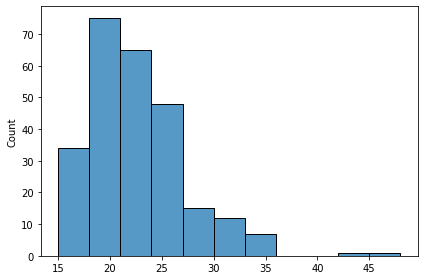

In [ ]:
#training histogram
sns.histplot(lenghts_tr,binwidth=3)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


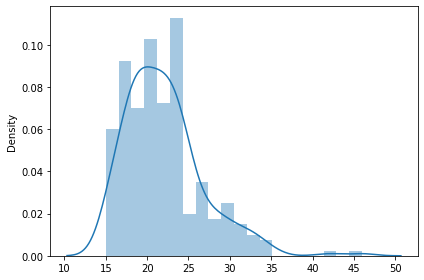

In [ ]:
#training density plot
sns.distplot(lenghts_tr)
plt.show()

Plotting the benchmark dataset with seaborn

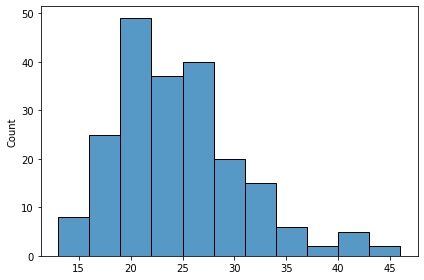

In [ ]:
#benchmark histogram
sns.histplot(lenghts_bh,binwidth=3)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


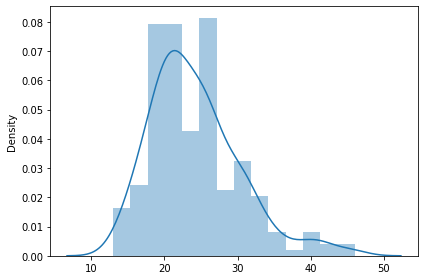

In [ ]:
#benchmark density plot
sns.distplot(lenghts_bh)
plt.show()

Discuss average and median and if you see a different distribution between training and benchmark discuss it. In this case they are very similar, but you can see that the benchmark there is a peptide smaller than 15.

### Comparative amino-acid composition of SPs against some background distribution

In [ ]:
#For the training
#First i build a dictionary storing the frequences of the amminoacids in the signal peptides dataset

sp_freq_tr = {}
for n_term in training_df["Sequence (first 50 N-terminal residues)"]:
  for aa in n_term:
    if aa in sp_freq_tr:
      sp_freq_tr[aa] += 1/(258*50)
    else: 
      sp_freq_tr[aa] = 0

#Then i create a dataframe with it
train_freq_df = pd.DataFrame.from_dict(sp_freq_tr, orient="index")
train_freq_df.columns = ["freq"]
train_freq_df.reset_index(level=0,inplace=True)
train_freq_df['index'] = pd.Categorical(train_freq_df['index'], ["G","A","V","P","L","I","M","F","W","Y","S","T","C","N","Q","H","D","E","K","R"])
train_freq_df.sort_values("index",inplace=True)
train_freq_df["freq"] = train_freq_df["freq"]*100
train_freq_df.columns = ["id","freq"]
train_freq_df

,id,freq
14,G,7.255814
4,A,9.558140
10,V,7.565891
9,P,5.333333
3,L,13.930233
15,I,4.178295
0,M,3.705426
2,F,4.372093
18,W,1.565891
17,Y,2.263566


In [ ]:
#For the benchmark
#First i build a dictionary storing the frequences of the amminoacids in the signal peptides dataset

sp_freq_bh = {}
for n_term in benchmark_df["Sequence (first 50 N-terminal residues)"]:
  for aa in n_term:
    if aa in sp_freq_bh:
      sp_freq_bh[aa] += 1/(209*50)
    else: 
      sp_freq_bh[aa] = 0

#Then i create a dataframe with it
bench_freq_df = pd.DataFrame.from_dict(sp_freq_bh, orient="index")
bench_freq_df.columns = ["freq"]
bench_freq_df.reset_index(level=0,inplace=True)
bench_freq_df['index'] = pd.Categorical(bench_freq_df['index'], ["G","A","V","P","L","I","M","F","W","Y","S","T","C","N","Q","H","D","E","K","R"])
bench_freq_df.sort_values("index",inplace=True)
bench_freq_df["freq"] = bench_freq_df["freq"]*100
bench_freq_df.columns = ["id","freq"]
bench_freq_df

,id,freq
9,G,6.995215
1,A,10.660287
8,V,6.775120
13,P,6.057416
5,L,13.607656
4,I,3.980861
0,M,3.540670
7,F,4.066986
14,W,1.655502
11,Y,2.334928


Creating a dataframe from the residue distribution of swissprot

In [ ]:
aa = pd.read_table("aa.txt", sep = " ",header = None)
aa.columns = ["Res","id","freq"]
aa['id'] = pd.Categorical(aa['id'], ["G","A","V","P","L","I","M","F","W","Y","S","T","C","N","Q","H","D","E","K","R"])
aa.sort_values("id",inplace=True)
aa["freq"] = aa["freq"].astype(float)
#type(aa["freq"][1])

In [ ]:
type(float(aa["freq"][1]))

float

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


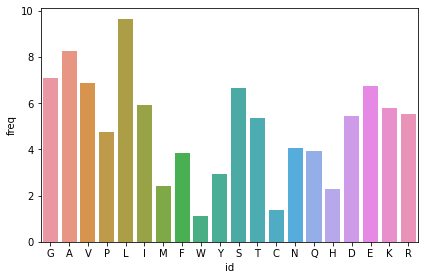

In [ ]:
sns.barplot(aa["id"], y=aa["freq"])
plt.show()

Comparing the frequences of the two dataframe in a single plot, using matplotlib.

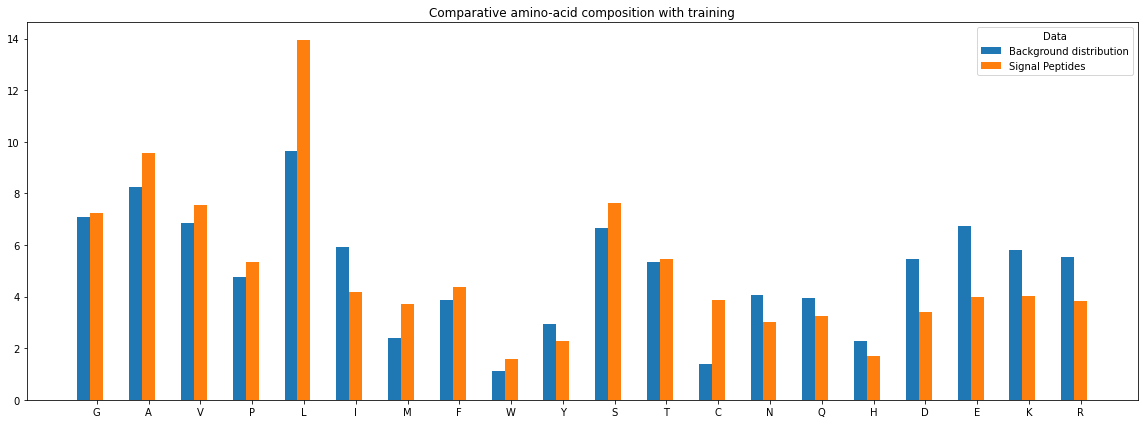

In [ ]:
#For training dataset
plt.figure(figsize=(16, 6))
width = 0.25
plt.bar(np.arange(len(aa))-width, aa["freq"], width, label="Background distribution")
plt.bar(np.arange(len(aa)), train_freq_df["freq"], width, label="Signal Peptides")
plt.xticks(np.arange(len(aa)), aa["id"])

plt.title("Comparative amino-acid composition with training")
plt.legend(title="Data")
plt.show()

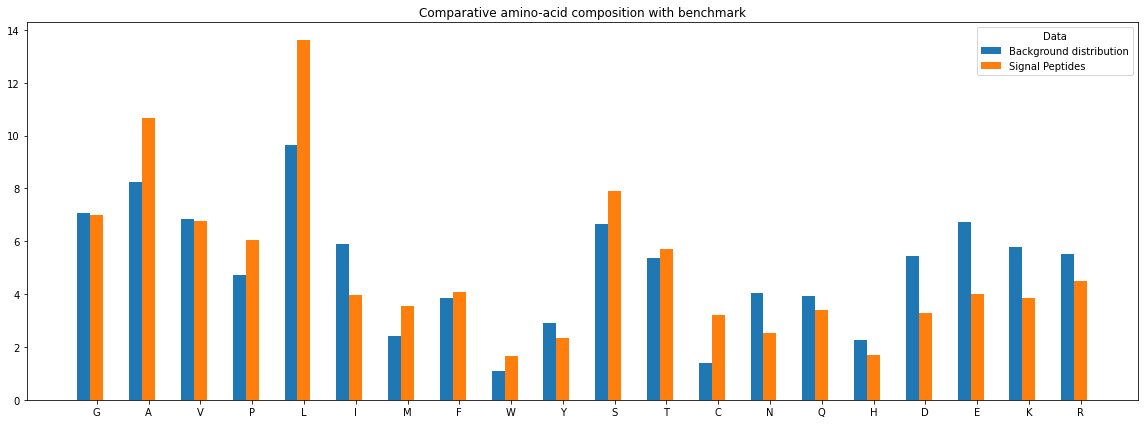

In [ ]:
#For benchmarking dataset
plt.figure(figsize=(16, 6))
width = 0.25
plt.bar(np.arange(len(aa))-width, aa["freq"], width, label="Background distribution")
plt.bar(np.arange(len(aa)), bench_freq_df["freq"], width, label="Signal Peptides")
plt.xticks(np.arange(len(aa)), aa["id"])

plt.title("Comparative amino-acid composition with benchmark")
plt.legend(title="Data")
plt.show()

Signal pepdites are more idrofobic than the background distribution.

In [ ]:
# Same thing but done with SEABORN for the training(be aware that the colors are inverted)

#plt.figure(figsize=(16,6))
#merged = pd.merge(aa, train_freq_df, on='id')
#merged.rename(columns={'freq_x':'SP', 'freq_y':'BG'}, inplace=True)
#merged = merged[['id', 'SP', 'BG']]
#merged = merged.melt(id_vars=['id'], var_name='dataset', value_name='frequencies')
#merged.tail()

#sns.barplot(merged['id'], y=merged['frequencies'], hue=merged['dataset'])
#plt.show()

### Taxonomy classification (kingdom and species level)
Create a pie chart

In [ ]:
full_training = pd.read_table("training.tsv")
full_training.head()

,UniProtKB accession,Taxa,Kingdom,Class,Cross-validation fold,Sequence (first 50 N-terminal residues),SP cleavage-site annotation
0,P61916,Homo sapiens (Human),Metazoa,SP,0,MRFLAATFLLLALSTAAQAEPVQFKDCGSVDGVIKEVNVSPCPTQP...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1,Q7M3V1,Chelonus sp. nr. curvimaculatus (Parasitic wasp),Metazoa,SP,0,MAGKEVIFIMALFIAVESSPIFSFDDLVCPSVTSLRVNVEKNECST...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...
2,Q08738,Bombyx mori (Silk moth),Metazoa,SP,0,MRVFLAICLSLTVALAAETGKYTPFQYNRVYSTVSPFVYKPGRYVA...,SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3,Q41350,Solanum lycopersicum (Tomato) (Lycopersicon es...,Plants,SP,0,MASSSAKILLPLSLLFTLLSLSQSTNPNFILTLVNNCPYTIWPAIQ...,SSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNN...
4,Q86SE1,Androctonus amoreuxi (African fattail scorpion...,Metazoa,SP,0,MNYLVMISLALLLMIGVESVRDGYIVYPHNCVYHCIPSCDGLCKEN...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...


In [ ]:
full_bench = pd.read_table("benchmark.tsv")
full_bench.head()

,UniProtKB accession,Taxa,Kingdom,Class,Sequence (first 50 N-terminal residues),SP cleavage-site annotation
0,Q8TF40,Homo sapiens (Human),Metazoa,NO_SP,MAPTLFQKLFSKRTGLGAPGRDARDPDCGFSWPLPEFDPSQIRLIV...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1,Q1ENB6,Arabidopsis thaliana (Mouse-ear cress),Plants,NO_SP,MDFTSLETTTFEEVVIALGSNVGNRMNNFKEALRLMKDYGISVTRH...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
2,Q9BZS1,Homo sapiens (Human),Metazoa,NO_SP,MPNPRPGKPSAPSLALGPSPGASPSWRAAPKASDLLGARGPGGTFQ...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3,F4K2A1,Arabidopsis thaliana (Mouse-ear cress),Plants,NO_SP,MFAVSIVPRTTSCRLSSAFLCQLSIPLTLRLHHHYQHHQPHLPSPL...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
4,Q9SZL8,Arabidopsis thaliana (Mouse-ear cress),Plants,NO_SP,MMDNEVLDFDIGVGVSSGGDVDDDAIDIEHHALDDDDMLDSPIMPC...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...


Kingdom Charts

In [ ]:
#For training set
kingdom = pd.DataFrame(full_training["Kingdom"].value_counts())
kingdom.reset_index(level=0,inplace=True)
kingdom.columns = ["labels","data"]
kingdom

,labels,data
0,Metazoa,956
1,Fungi,429
2,Plants,314
3,Other,24


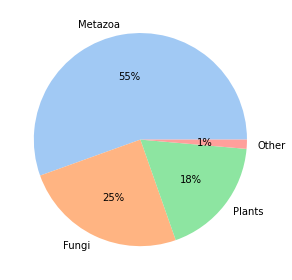

In [ ]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(kingdom["data"], labels = kingdom["labels"], colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
#For benchmark set
kingdom2 = pd.DataFrame(full_bench["Kingdom"].value_counts())
kingdom2.reset_index(level=0,inplace=True)
kingdom2.columns = ["labels","data"]
kingdom2

,labels,data
0,Metazoa,3707
1,Plants,1890
2,Fungi,1743
3,Other,116


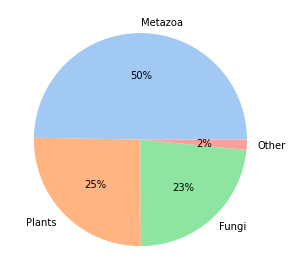

In [ ]:
plt.pie(kingdom2["data"], labels = kingdom2["labels"], colors = colors, autopct='%.0f%%')
plt.show()

Taxa pie charts

In [ ]:
#For training set
taxa = pd.DataFrame(full_training["Taxa"].value_counts())
taxa.reset_index(level=0,inplace=True)
taxa.columns = ["labels","data"]
taxa.loc[taxa['data'] <= 60, 'labels'] = "Other"
other_data = taxa.loc[taxa['labels'] == "Other",'data'].sum()
taxa.drop(taxa[taxa['data'] <= 60].index, inplace = True)
taxa.loc[len(taxa.index)] = ["Other",other_data]
taxa

,labels,data
0,Homo sapiens (Human),434
1,Arabidopsis thaliana (Mouse-ear cress),235
2,Saccharomyces cerevisiae (strain ATCC 204508 /...,219
3,Mus musculus (Mouse),197
4,Schizosaccharomyces pombe (strain 972 / ATCC 2...,180
5,Other,458


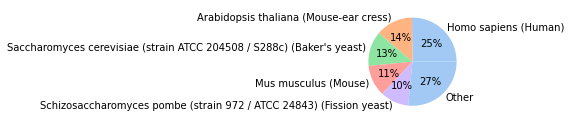

In [ ]:
plt.pie(taxa["data"], labels = taxa["labels"], colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
#For benchmark set
taxa2 = pd.DataFrame(full_bench["Taxa"].value_counts())
taxa2.reset_index(level=0,inplace=True)
taxa2.columns = ["labels","data"]
taxa2.loc[taxa2['data'] <= 400, 'labels'] = "Other"
other_data2 = taxa2.loc[taxa2['labels'] == "Other",'data'].sum()
taxa2.drop(taxa2[taxa2['data'] <= 400].index, inplace = True)
taxa2.loc[len(taxa2.index)] = ["Other",other_data2]
taxa2

,labels,data
0,Homo sapiens (Human),1838
1,Arabidopsis thaliana (Mouse-ear cress),1551
2,Saccharomyces cerevisiae (strain ATCC 204508 /...,884
3,Schizosaccharomyces pombe (strain 972 / ATCC 2...,755
4,Mus musculus (Mouse),722
5,Other,1705


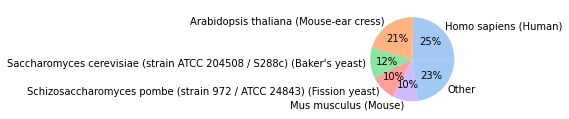

In [ ]:
plt.pie(taxa2["data"], labels = taxa2["labels"], colors = colors, autopct='%.0f%%')
plt.show()

We should have added another piece of pie storing "other species", grouping all the excluded ones.

### Sequence logo of SP cleavage sites

In [ ]:
training_df.head()

,UniProtKB accession,Taxa,Kingdom,Class,Cross-validation fold,Sequence (first 50 N-terminal residues),SP cleavage-site annotation,lenghts
0,P61916,Homo sapiens (Human),Metazoa,SP,0,MRFLAATFLLLALSTAAQAEPVQFKDCGSVDGVIKEVNVSPCPTQP...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...,19
1,Q7M3V1,Chelonus sp. nr. curvimaculatus (Parasitic wasp),Metazoa,SP,0,MAGKEVIFIMALFIAVESSPIFSFDDLVCPSVTSLRVNVEKNECST...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...,20
2,Q08738,Bombyx mori (Silk moth),Metazoa,SP,0,MRVFLAICLSLTVALAAETGKYTPFQYNRVYSTVSPFVYKPGRYVA...,SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,16
3,Q41350,Solanum lycopersicum (Tomato) (Lycopersicon es...,Plants,SP,0,MASSSAKILLPLSLLFTLLSLSQSTNPNFILTLVNNCPYTIWPAIQ...,SSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNN...,24
4,Q86SE1,Androctonus amoreuxi (African fattail scorpion...,Metazoa,SP,0,MNYLVMISLALLLMIGVESVRDGYIVYPHNCVYHCIPSCDGLCKEN...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...,19


In [ ]:
#for training
sequences_tr = []
for index,row in training_df.iterrows():
    site = row["lenghts"]
    i= 0
    seq = ""
    while i < site+2:
        if i < site-13:
            i += 1
            continue
        seq += row["Sequence (first 50 N-terminal residues)"][i]
        i += 1
    sequences_tr.append(seq)

print(sequences_tr)

['TFLLLALSTAAQAEP', 'FIMALFIAVESSPIF', 'FLAICLSLTVALAAE', 'LSLLFTLLSLSQSTN', 'ISLALLLMIGVESVR', 'IIFPNEFSKPTRAFS', 'LFSTATLISTGWGLD', 'ILLQFSAWTTTDAVT', 'LLCLAAVLRQSFGNV', 'VIAFSTVHQTVAAVD', 'LLLLLASVSLALGDP', 'GALFLALLAGAHAEF', 'FSLALLLMTGVESVR', 'DPIAEIERSNCKIAH', 'VLTVLLMGTGCISAP', 'FLTLVSFSNMSDQAG', 'LLLLAGLAHGASALF', 'ALLVLLFCFRGRAGP', 'ISFALLLMKGVESVR', 'VALLFSHVDHISAET', 'LLWASLLSGVLAGRA', 'WALLLLWSPCTFSLP', 'IVVLLLVIAFSHGAV', 'FLLFLIATTRGWSTD', 'VLLVSCFLSQGAAIE', 'LLFLVLSAGSGISGP', 'LLALALILPGTLCAE', 'LVLIAFTCYTCSDAT', 'IFLVLLVATSAYAAP', 'TLVLFLLAQVSWAGP', 'SVFFLLLPGPSAADE', 'LPILAAVLQQSSGNV', 'ILLLLSLVASIFSTP', 'LLFLVLSAGSGFTQG', 'QSLTVSRGGLVAADR', 'LVVTIVCLDLASTMI', 'LPPLLLTPRAGDAAV', 'ASLVFFLCQMISALD', 'VAMSLVSCSTAAPAK', 'LLALLLLAAAAEAAK', 'VFVFCFLIKLLTGEL', 'FLAVSLLCALANAYP', 'VLALLLLCSYTCGSQ', 'LGLFLLLPRPVPAPC', 'FVLLLSEIVSISASS', 'WFAIATLITICYAAK', 'LWLPTSGLWTVQAMD', 'CLMLAGLCSLVTSHL', 'CAVLALVLAPAGAFR', 'LLILACFVALALARA', 'LVAVFLICETLVAQR', 'LTAIAALAARAAAVG', 'LALFLAAPWG

In [ ]:
with open("seq_file_training.txt","w") as seqfile:
    seqfile.write('\n'.join(sequences_tr))

Training sequence logo:

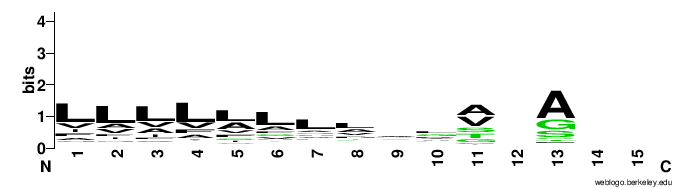

In [ ]:
#For benchmark
sequences_bh = []
for index,row in benchmark_df.iterrows():
    site = row["lenghts"]
    i= 0
    seq = ""
    while i < site+2:
        if i < site-13:
            i += 1
            continue
        seq += row["Sequence (first 50 N-terminal residues)"][i]
        i += 1
    sequences_bh.append(seq)

print(sequences_bh)

['LTLFAVLIGSASAVY', 'ILLMVVVLALSSAQD', 'FLVCAFWIPDSRGMP', 'LLLHAAFHGGALGEK', 'CLSVASLVSYAGAAS', 'FLLLVAAPRWVLSQL', 'IILFASILAAISATS', 'LLILVSLAALAHAES', 'FLSAALSLWPTSGEI', 'LFLAAVAGALVYAED', 'MERANHSLVRMRREG', 'ALCFVLLVGFAAACQ', 'LLLLAGLALVGEART', 'YVWPLLLCSPCLLIQ', 'FFLSCSFVSLVSSEK', 'LLWASLLSGVLAGRA', 'MLLLCLGVPTGRPYN', 'LLLLLPPPPRVGGFN', 'LLLGLQLFAKAWSYN', 'AALISVSLSGTLANR', 'ALMVAAGGCVVSAFN', 'LLLGPCAAPPAWALN', 'TLLCIASLALLAAFN', 'RVLLLTALTLCHGFN', 'LALSQGILNCCLAYN', 'LFVCSMIIGICEGRE', 'LVAGVVAVSAALASK', 'VLLASVLWVTVRSQQ', 'VIMTIMPDMKVEAVS', 'FLVIMVISSLVDCAK', 'LLTISDFLFLSLTFS', 'LLLALLTLGLAAQHQ', 'LLTLLTQDTGSWAQS', 'PVLALAFGSLAAAAP', 'ALCCGLLAASAHAGY', 'WLLLAALLGCTLAEE', 'RILAIVFAARHVAAL', 'AAFLFLSWTHCRALP', 'LAHQHHQHKEEKRAV', 'LAVVIFIINDVSSQG', 'LLAFLHSASLLNGDS', 'LALFGFLWEASGGLD', 'LLQLLLLVGPGGCLN', 'LLLLPLLMLRAAALH', 'FIVTMLIVDEVNSFK', 'LVVGLAAVAGVDGAT', 'VICMVVIAPMAEAAL', 'IAFALCLHHLISAIE', 'LSLALLGIQVARSAI', 'VFVTLRVIAAVISEE', 'VAACFSLCGPLLSAR', 'WLLLLALPAVCSALP', 'SLLLLLEPQI

In [ ]:
with open("seq_file_benchmark.txt","w") as seqfile:
    seqfile.write('\n'.join(sequences_bh))

Benchmark sequence logo:

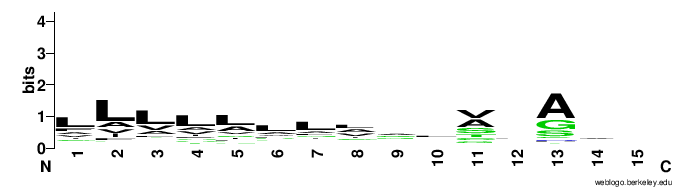

In [ ]:
#! pip install weblogo

In [ ]:
#! pip install Ghostscript

In [ ]:
#! weblogo -h
#! weblogo -f seq_file.txt -o seq_logo -F jpeg
#BENCHMARK LOGO

# VonHeijne method for SP detection

## TRAINING

### Data preparation

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [30]:
#!wget -O benchmark.tsv https://www.dropbox.com/s/jkflna9nvumum1v/benchmark_set.tsv?dl=0
!wget -O training.tsv https://www.dropbox.com/s/k145z0yty08oa33/training_set.tsv?dl=0
! gdown --id 1vtwDf1VUcv7vPhch8kN3j5DnzQ7hnk2M

--2022-12-11 13:18:32--  https://www.dropbox.com/s/k145z0yty08oa33/training_set.tsv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/k145z0yty08oa33/training_set.tsv [following]
--2022-12-11 13:18:32--  https://www.dropbox.com/s/raw/k145z0yty08oa33/training_set.tsv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfaab6bf31fdc57dbaddf758045.dl.dropboxusercontent.com/cd/0/inline/ByZcuza3PFmrd14Ig1dd4GIeVTQ8caedgg2895fGXgmAHC5ZVghrlwCSdpLFaRqa5HPUqCMFk07ZepcXno1a6k0qo1ecspf3aTyqoY1AsHu3uBVVk6lxPGtnZtVSMbBfJNMVCX5NAUf0tm2hLb0l2DJLrqBfc0LPu9lUPqyx5KOUmg/file# [following]
--2022-12-11 13:18:33--  https://ucfaab6bf31fdc57dbaddf758045.dl.dropboxusercontent.com/cd/0/inline/ByZcuza3PFmrd14Ig1dd4GIeVTQ8caedgg2895fGXgmAHC5ZVghrlwCSdpLFaRq

In [31]:
aa = pd.read_table("aa.txt", sep = " ",header = None)
aa.columns = ["Res","id","freq"]
aa['id'] = pd.Categorical(aa['id'], ["G","A","V","P","L","I","M","F","W","Y","S","T","C","N","Q","H","D","E","K","R"])
aa.sort_values("id",inplace=True)
aa["freq"] = aa["freq"].astype(float)
#type(aa["freq"][1])

In [32]:
training_df = pd.read_table("training.tsv")
training_df.head()

,UniProtKB accession,Taxa,Kingdom,Class,Cross-validation fold,Sequence (first 50 N-terminal residues),SP cleavage-site annotation
0,P61916,Homo sapiens (Human),Metazoa,SP,0,MRFLAATFLLLALSTAAQAEPVQFKDCGSVDGVIKEVNVSPCPTQP...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1,Q7M3V1,Chelonus sp. nr. curvimaculatus (Parasitic wasp),Metazoa,SP,0,MAGKEVIFIMALFIAVESSPIFSFDDLVCPSVTSLRVNVEKNECST...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...
2,Q08738,Bombyx mori (Silk moth),Metazoa,SP,0,MRVFLAICLSLTVALAAETGKYTPFQYNRVYSTVSPFVYKPGRYVA...,SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3,Q41350,Solanum lycopersicum (Tomato) (Lycopersicon es...,Plants,SP,0,MASSSAKILLPLSLLFTLLSLSQSTNPNFILTLVNNCPYTIWPAIQ...,SSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNN...
4,Q86SE1,Androctonus amoreuxi (African fattail scorpion...,Metazoa,SP,0,MNYLVMISLALLLMIGVESVRDGYIVYPHNCVYHCIPSCDGLCKEN...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...


In [33]:
#this is the matrix with the background frequences
aa["freq"] = aa["freq"] / 100
aa["freq"]

9     0.0707
0     0.0825
19    0.0686
18    0.0474
2     0.0965
17    0.0591
10    0.0241
14    0.0386
11    0.0110
15    0.0292
3     0.0664
7     0.0535
16    0.0138
8     0.0406
1     0.0393
13    0.0227
12    0.0546
5     0.0672
6     0.0580
4     0.0553
Name: freq, dtype: float64

We have to split the full set in 5 runs, in which:
- We divide the training set in two parts (4 fold for the training, and 1 for the validation).
- We compute the PSWM on the sequences bearing SPs in the chosen training set
- We use the matrix to predict the scores of the sequences of the set (including the ones without SPs)
- We compute the optimal trashold on the same set
- We test the th and the PSWM on the validation set that was left behind
- We produce statistics (confusion matrix, accuracy, MCC)

This will be repeated 5 times, each times using as validation set a different fold.
Later we will do the test for the final performance on the benchmark set:
- We will use as final PSWM the one computed on the full training set and as the Trashold the mean between the optimal ones used in the 5 runs.
- We will evaluate the model.


In [34]:
def len_sp(df):
  '''This function takes a data frame storing only sequences with SP, and returns a list with all the lenghts of the respective SPs'''
  lenghts_tr = []
  for sp in df['SP cleavage-site annotation']:
      leng = 0
      for char in sp:
          if char == "S":
              leng += 1
      lenghts_tr.append(leng)
  return lenghts_tr

#We will append the list as a column to the dataframe
#training_df["lenghts"] = len_sp(training_df)

In [35]:
def seq_sp(df):
    '''This function takes in input a dataframe storing sequences with a SP, and returns a list of those SPs'''
    sequences_tr = []
    for index,row in df.iterrows():
        site = row["lenghts"]
        i= 0
        seq = ""
        while i < site+2:
            if i < site-13:
                i += 1
                continue
            seq += row["Sequence (first 50 N-terminal residues)"][i]
            i += 1
        sequences_tr.append(seq)
    return(sequences_tr)

### training

In [36]:
#This function is used to build the psw matrix for the algorithm

def pswm_build(seqs,aa):
    '''The function takes in input the list of the sequences of the signal peptides and the background frequencies of the amminoacids'''
    matrix = np.ones((15,20))
    res_order = "GAVPLIMFWYSTCNQHDEKR"
    #Every time a residue is found in a spot, the matrix gets a plus 1 in the specific position
    for seq in seqs:
        for i,res in enumerate(seq):
            pos = res_order.find(res)
            matrix[i][pos] += 1

    #To normalize
    matrix = matrix / (len(seqs)+20)

    for j,freq in enumerate(aa["freq"]):
        for i in range(0,15):
            matrix[i][j] = matrix[i][j]/freq

    matrix = np.log2(matrix)

    return matrix

#PSWM = pswm_build(sequences_tr,aa)
#PSWM

In [37]:
from pandas.io.pytables import DataFrame
def predict_sp(pswm,df,res_order = "GAVPLIMFWYSTCNQHDEKR"):

    '''
    This function takes the matrix and the dataframe with the training set, and for each sequence, computes the score for each slide of 15 amminoacid in the sequence.
    The slide having the max score is stored in a dataframe
    All the variables iterating are used to store the information for each sequence.
    '''

    results = pd.DataFrame(columns=["Uniprot ID","Sequence","Signal Peptide","Score","Real Class","Cross-validation fold"])
    full_sequences = df["Sequence (first 50 N-terminal residues)"]
    ids = df["UniProtKB accession"]
    classes = df["Class"]
    folds = df["Cross-validation fold"]

    for seq,sp,id,fold in zip(full_sequences,classes,ids,folds):
      slide_i = 0
      score_max = -999

      #after the while loop, the max scoring slide is stored
      while slide_i != 35:
          slide = seq[slide_i:slide_i+15]
          score = 0
          for i,res in enumerate(slide):
              score += pswm[i,res_order.find(res)]
          if score > score_max:
              score_max = score
              slide_max = slide
          slide_i += 1    
      
      #The informations are added to a new row in the dataframe
      results.loc[len(results.index)] = [id,seq,slide_max,score_max,sp,fold]

    results.loc[results['Real Class'] == "SP", 'Real Class'] = 1
    results.loc[results['Real Class'] == "NO_SP", 'Real Class'] = 0
    
    return results

### Cross-Validation

The 5-fold cross validation is done by selecting in turns 4 folds of the training set to find the optimal treshold, and the fifth to test it. In the end we will get 5 treshold to test on each one of the excluded folds; the one that gives the lowest error rate will be selected for the real test on the benchmark.

Precision-recall curve values:
- precision: contains precision scores at varying thresholds
- recall: contains recall scores at varying thresholds
- thresholds: the thresholds values

In [38]:
from sklearn.metrics import precision_recall_curve


def th_compute(df):
    '''Loop for 5-fold cross validation'''
        # binary representation of the true (observed) class for each training example: 0=NO_SP, 1=SP
    y_train = df["Real Class"].tolist()
        # SP detection scores assigned to each training example by means of weight matrix scanning
    y_train_scores = df["Score"].tolist()

    precision, recall, thresholds = precision_recall_curve(y_train, y_train_scores)
        # compute f-scores at varying thresholds
    fscore = (2 * precision * recall) / (precision + recall)
        # get the index of the maximum value of the f-score
    index = np.argmax(fscore)
        # retrieve the threshold value corresponding to the max f-score computed above
    return thresholds[index],fscore[index],precision[index],recall[index]

#ths = th_compute(results)
#print(ths)
    

In [39]:
def predict(df,th):
    # SP detection scores assigned to each testing example by means of weight matrix scanning
    y_test_scores = df["Score"].tolist()
    # classify examples in the testing set
    y_pred_test = [int(t_s >= th) for t_s in y_test_scores]
    df["Predicted Class"] = y_pred_test
    return

In [40]:
def cm_counter(test_results):
    '''This function is used to count the false positive and false negative, which will be used to build the confusion matrix'''
    True_neg = test_results["Real Class"].value_counts()[0]
    True_pos = test_results["Real Class"].value_counts()[1]
    False_pos = 0
    False_neg = 0
    for real_t,pred_t in zip(test_results["Real Class"],test_results["Predicted Class"]):
        if real_t == 0 and pred_t == 1:
            False_pos += 1
        elif real_t == 1 and pred_t == 0:
            False_neg += 1
    return (True_neg-False_pos),(True_pos-False_neg),False_pos,False_neg

In [41]:
def get_stats(TN,TP,FP,FN):
    '''Matthew correlation coefficient'''
    n = TP*TN-FP*FN   #numerator
    d = np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)) #denominator

    mcc = n/d
    acc = (TP+TN)/(TP+TN+FP+FN)
    prec = TP/(TP+FP)
    rec = TP/(TP+FN)
    f1 = (2*prec*rec) / (prec+rec)
    return mcc,acc,prec,rec,f1

### Full pipeline

In [42]:
def VonHejne_cv(df,aa):
    '''
    This function contains the whole pipeline to apply the VonHejne algorithm to a training dataset. 
    It includes the 5-fold cross validation; in fact it returns the optimal threshold to use and some performance metrix
    '''

    #These variables will store the mean results from each fold of the cross validation
    final_th = 0                                 #Threshold
    cm_data = {"TN":0,"TP":0,"FP":0,"FN":0}      #Confusion matrix
    results = pd.DataFrame(columns=["Excluded Fold","MCC","ACC","Precision","Recall","F1 Score"])
  
    
    #The loop will repeat one time for each fold, computing th and performance metrics
    for i in range(5):
        
        #First we prepare the dataframes
        df_train = df.loc[df['Cross-validation fold'] != i]               #This stores the training set
        df_train_only_SP = df_train.loc[df_train['Class'] == "SP"]        #This stores the positives of the training set
        df_test = df.loc[df['Cross-validation fold'] == i]                #This stores the validation set

        #First the PSWM matrix is computed for this fold
        df_train_only_SP["lenghts"] = len_sp(df_train_only_SP)
        sp_sequences = seq_sp(df_train_only_SP)
        PSWM = pswm_build(sp_sequences,aa)

        #Then the prediction is done on the training set; the optimal threshold and the optimal fscore are computed and stored
        df_train = predict_sp(PSWM,df_train)
        th,fscore,prec,rec = th_compute(df_train)
        final_th += th


        #The th and the matrix are used to predict the class of the validation set, then used to build the confusion matrix
        df_test = predict_sp(PSWM,df_test)
        predict(df_test,th)
        TN,TP,FP,FN = cm_counter(df_test)
        cm_data["TN"] += TN
        cm_data["TP"] += TP
        cm_data["FP"] += FP
        cm_data["FN"] += FN

        #Starting from the confusion matrix we compute mcc and accuracy
        mcc,acc,bin1,bin2,bin3 = get_stats(TN,TP,FP,FN)

        
        results.loc[len(results.index)] = [i,mcc,acc,prec,rec,fscore]

        #TH, accuracy, matthew, and the data for the CM are added to the general variable

    #All the statistics are divided by five, to obtain a mean    
    final_cm = {key: value / 5 for key, value in cm_data.items()}

    #This part is used to compute the PSWM matrix on the full training set; it will be needed for the test on the benchmark
    full_df_only_sp = df.loc[df['Class'] == "SP"]
    full_df_only_sp["lenghts"] = len_sp(full_df_only_sp)
    sp_sequences_fin = seq_sp(full_df_only_sp)
    final_PSWM = pswm_build(sp_sequences_fin,aa)

    return(final_th/5,final_cm,results,final_PSWM)

In [43]:
TH,CV_cm,table,final_PSWM = VonHejne_cv(training_df,aa)

<ipython-input-42-5659c1d4499b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_only_SP["lenghts"] = len_sp(df_train_only_SP)
<ipython-input-42-5659c1d4499b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_only_SP["lenghts"] = len_sp(df_train_only_SP)
<ipython-input-42-5659c1d4499b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [44]:
table

,Excluded Fold,MCC,ACC,Precision,Recall,F1 Score
0,0.0,0.811893,0.953623,0.839450,0.888350,0.863208
1,1.0,0.750617,0.933333,0.875000,0.883495,0.879227
2,2.0,0.796634,0.950725,0.895522,0.873786,0.884521
3,3.0,0.764155,0.939130,0.854460,0.883495,0.868735
4,4.0,0.796429,0.950437,0.897436,0.841346,0.868486


In [45]:
Stats = []
for metric in table.columns[1:]:
    string = "%.3f +/- %.3f" % (table[metric].mean(), (table[metric].std()/np.sqrt(5)))
    Stats.append(string)

In [46]:
print("Optimal Threshold: ", TH, "\nMatthews Correlation Coefficient: ", Stats[0],"\nAccuracy: ",Stats[1],"\nPrecision: ",Stats[2],"\nRecall: ",Stats[3],"\nF1 score: ",Stats[4])

Optimal Threshold:  8.205864702875445 
Matthews Correlation Coefficient:  0.784 +/- 0.011 
Accuracy:  0.945 +/- 0.004 
Precision:  0.872 +/- 0.011 
Recall:  0.874 +/- 0.009 
F1 score:  0.873 +/- 0.004


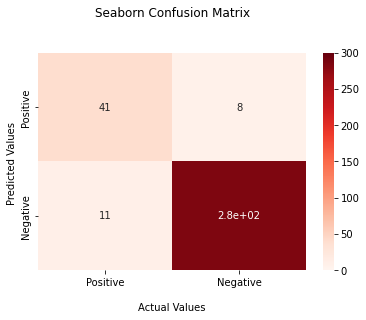

In [47]:
cf_matrix = np.array([[CV_cm["TP"],CV_cm["FP"]],[CV_cm["FN"],CV_cm["TN"]]])

ax = sns.heatmap(cf_matrix, annot=True, cmap="Reds", vmin=0, vmax=300)

ax.set_title('Seaborn Confusion Matrix\n\n');
ax.set_xlabel('\nActual Values')
ax.set_ylabel('Predicted Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Positive','Negative'])
ax.yaxis.set_ticklabels(['Positive','Negative',])

## Display the visualization of the Confusion Matrix.
#plt.savefig('High_CM.png', dpi = 300, bbox_inches='tight')
plt.show()

In [48]:
final_cv_results = pd.DataFrame(columns=["Method","MCC","Accuracy","Precision","Recall","F1 score"])
final_cv_results.loc[len(final_cv_results.index)] = ["VonHeijne",Stats[0],Stats[1],Stats[2],Stats[3],Stats[4]]
#add the standard error to the mean values: standard deviation/ 5 (since we use 5 fold)

In [49]:
final_cv_results

,Method,MCC,Accuracy,Precision,Recall,F1 score
0,VonHeijne,0.784 +/- 0.011,0.945 +/- 0.004,0.872 +/- 0.011,0.874 +/- 0.009,0.873 +/- 0.004


## TEST

The selected treshold will now be used on the benchmark set

In [50]:
!wget -O benchmark.tsv https://www.dropbox.com/s/jkflna9nvumum1v/benchmark_set.tsv?dl=0
benchmark_df = pd.read_table("benchmark.tsv")

--2022-12-11 13:18:55--  https://www.dropbox.com/s/jkflna9nvumum1v/benchmark_set.tsv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/jkflna9nvumum1v/benchmark_set.tsv [following]
--2022-12-11 13:18:55--  https://www.dropbox.com/s/raw/jkflna9nvumum1v/benchmark_set.tsv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8708e739a511f1bc6a55b1418b.dl.dropboxusercontent.com/cd/0/inline/ByZM1zH-1B4TtNGexliKzhNGANeMziLuKhbQJXSbsiTROSLDvX4tE6BEBeUpxuosC0JsgVlASxS7uBJz5Zf55MuUlFIqYrShdiNx9x4hYGXiPpFatsbBy2edPplaiMsPPWoKAjQeZYGWw-8KC0WHZnRfb4OxCepmA7gMCFXKMcHa0w/file# [following]
--2022-12-11 13:18:55--  https://uc8708e739a511f1bc6a55b1418b.dl.dropboxusercontent.com/cd/0/inline/ByZM1zH-1B4TtNGexliKzhNGANeMziLuKhbQJXSbsiTROSLDvX4tE6BEBeUp

In [51]:
benchmark_df["Cross-validation fold"] = np.zeros(len(benchmark_df))
test_results = predict_sp(final_PSWM,benchmark_df)

In [52]:
test_results.head()

,Uniprot ID,Sequence,Signal Peptide,Score,Real Class,Cross-validation fold
0,Q8TF40,MAPTLFQKLFSKRTGLGAPGRDARDPDCGFSWPLPEFDPSQIRLIV...,FSWPLPEFDPSQIRL,-0.725573,0,0.0
1,Q1ENB6,MDFTSLETTTFEEVVIALGSNVGNRMNNFKEALRLMKDYGISVTRH...,VVIALGSNVGNRMNN,-3.368714,0,0.0
2,Q9BZS1,MPNPRPGKPSAPSLALGPSPGASPSWRAAPKASDLLGARGPGGTFQ...,APSLALGPSPGASPS,4.549301,0,0.0
3,F4K2A1,MFAVSIVPRTTSCRLSSAFLCQLSIPLTLRLHHHYQHHQPHLPSPL...,RLSSAFLCQLSIPLT,3.632633,0,0.0
4,Q9SZL8,MMDNEVLDFDIGVGVSSGGDVDDDAIDIEHHALDDDDMLDSPIMPC...,VLDFDIGVGVSSGGD,1.210233,0,0.0


In [53]:
predict(test_results,TH)

In [54]:
TN,TP,FP,FN = cm_counter(test_results)

In [55]:
test_results.groupby("Real Class").size()

Real Class
0    7247
1     209
dtype: int64

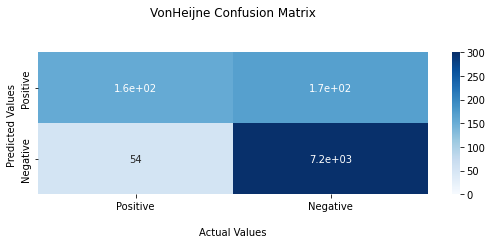

In [160]:
cf_matrix = np.array([[TP,FP],[FN,TN]])

ax = sns.heatmap(cf_matrix, annot=True, cmap="Blues", vmin=0, vmax=300)

ax.set_title('VonHeijne Confusion Matrix\n\n');
ax.set_xlabel('\nActual Values')
ax.set_ylabel('Predicted Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Positive','Negative'])
ax.yaxis.set_ticklabels(['Positive','Negative',])

## Display the visualization of the Confusion Matrix.
#plt.savefig('High_CM.png', dpi = 300, bbox_inches='tight')
plt.show()

In [57]:
print(cf_matrix)

[[ 155  169]
 [  54 7078]]


In [58]:
MCC,ACC,PREC,REC,F1 = get_stats(TN,TP,FP,FN)
print("Matthews correlation coefficient: ",MCC,"\nAccuracy: ",ACC,"\nPrecision: ",PREC,"\nRecall: ",REC,"\nF1 Score: ",F1)

Matthews correlation coefficient:  0.5815460081891723 
Accuracy:  0.9700912017167382 
Precision:  0.4783950617283951 
Recall:  0.7416267942583732 
F1 Score:  0.5816135084427768


In [59]:
final_bench_results = pd.DataFrame(columns=["Method","Mcc","Accuracy","Precision","Recall","F1 score"])
final_bench_results.loc[len(final_bench_results.index)] = ["VonHeijne",MCC,ACC,PREC,REC,F1]

In [60]:
final_bench_results

,Method,Mcc,Accuracy,Precision,Recall,F1 score
0,VonHeijne,0.581546,0.970091,0.478395,0.741627,0.581614


# Support Vector Machine

1. Build the starting matrix form the training set --> Sequences are points in the 20-dimensional space corresponding to AA compositions of the first K residues. K will be an hyperparameter -> we need to find the best value
(Test different values of K moving around the SP-mean length (e.g. from K=20 to K=24) in cross-validation and choose the best one)

2. Use non-linear SVMs with RBF kernel:
 - C parameter to need to be optimized
  - RBF kernel parameter gamma need to be optimized

3. For the three hyperparameters (K, C and gamma) run a grid-search with
cross-validation.

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
!wget -O benchmark.tsv https://www.dropbox.com/s/jkflna9nvumum1v/benchmark_set.tsv?dl=0
!wget -O training.tsv https://www.dropbox.com/s/k145z0yty08oa33/training_set.tsv?dl=0

## Data Preparation

In [63]:
data = pd.read_table("training.tsv")
data.head()

,UniProtKB accession,Taxa,Kingdom,Class,Cross-validation fold,Sequence (first 50 N-terminal residues),SP cleavage-site annotation
0,P61916,Homo sapiens (Human),Metazoa,SP,0,MRFLAATFLLLALSTAAQAEPVQFKDCGSVDGVIKEVNVSPCPTQP...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1,Q7M3V1,Chelonus sp. nr. curvimaculatus (Parasitic wasp),Metazoa,SP,0,MAGKEVIFIMALFIAVESSPIFSFDDLVCPSVTSLRVNVEKNECST...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...
2,Q08738,Bombyx mori (Silk moth),Metazoa,SP,0,MRVFLAICLSLTVALAAETGKYTPFQYNRVYSTVSPFVYKPGRYVA...,SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3,Q41350,Solanum lycopersicum (Tomato) (Lycopersicon es...,Plants,SP,0,MASSSAKILLPLSLLFTLLSLSQSTNPNFILTLVNNCPYTIWPAIQ...,SSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNN...
4,Q86SE1,Androctonus amoreuxi (African fattail scorpion...,Metazoa,SP,0,MNYLVMISLALLLMIGVESVRDGYIVYPHNCVYHCIPSCDGLCKEN...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...


In [64]:
data.loc[data['Class'] == "SP", 'Class'] = 1
data.loc[data['Class'] == "NO_SP", 'Class'] = 0
data.head()

,UniProtKB accession,Taxa,Kingdom,Class,Cross-validation fold,Sequence (first 50 N-terminal residues),SP cleavage-site annotation
0,P61916,Homo sapiens (Human),Metazoa,1,0,MRFLAATFLLLALSTAAQAEPVQFKDCGSVDGVIKEVNVSPCPTQP...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1,Q7M3V1,Chelonus sp. nr. curvimaculatus (Parasitic wasp),Metazoa,1,0,MAGKEVIFIMALFIAVESSPIFSFDDLVCPSVTSLRVNVEKNECST...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...
2,Q08738,Bombyx mori (Silk moth),Metazoa,1,0,MRVFLAICLSLTVALAAETGKYTPFQYNRVYSTVSPFVYKPGRYVA...,SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3,Q41350,Solanum lycopersicum (Tomato) (Lycopersicon es...,Plants,1,0,MASSSAKILLPLSLLFTLLSLSQSTNPNFILTLVNNCPYTIWPAIQ...,SSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNN...
4,Q86SE1,Androctonus amoreuxi (African fattail scorpion...,Metazoa,1,0,MNYLVMISLALLLMIGVESVRDGYIVYPHNCVYHCIPSCDGLCKEN...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...


In [65]:
def len_sp(df):
  '''This function takes a data frame storing only sequences with SP, and returns a list with all the lenghts of the respective SPs'''
  lenghts_tr = []
  for sp in df['SP cleavage-site annotation']:
      leng = 0
      for char in sp:
          if char == "S":
              leng += 1
      lenghts_tr.append(leng)
  return lenghts_tr

In [66]:
lenghts = len_sp(data.loc[data['Class'] == 1])
k = sum(lenghts)/len(lenghts)
k

22.027131782945737

The class column will be used as the Y vector storing the real classes of the entries for the cross validation.

In [67]:
y_train = np.array(data["Class"]).astype('int')
y_train[:5]

array([1, 1, 1, 1, 1])

In [68]:
data["Class"].value_counts()/5

0    293.0
1     51.6
Name: Class, dtype: float64

In [69]:
from sklearn.preprocessing import normalize

def k_matrix(seqs,K=22):
    '''
    This function takes a list of n sequence and an hyperparameter K, and builds a matrix of n rows,
    each one storing the frequencies (normalized) of the residues (one per column).
    '''
    order = "GAVPLIMFWYSTCNQHDEKR"
    df = pd.DataFrame(columns=list(order))
    for seq in seqs:
        v = [0 for i in range(20)]
        for char in seq[:K]:
            col = order.find(char)
            v[col] += 1
        df.loc[len(df.index)] = v
    return normalize(np.array(df))

## Hyperparameter tuning

In [70]:
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score   
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split


In [71]:
def fold_i(folds):
    '''
    This function takes the column with the folds from the training set and gives back the indexes in which the folds changes
    '''
    indexes = [0]
    for i,value in enumerate(folds):
            if i == len(folds)-1: break
            if value != folds[i+1]:
                indexes.append(i+1)
    indexes.append(i)
    indexes.append(i)
    return indexes

ind = fold_i(data["Cross-validation fold"])
ind

[0, 345, 690, 1035, 1380, 1722, 1722]

In [72]:
def get_stats2(cm):
    '''Matthew correlation coefficient'''
    TN,FP,FN,TP = cm.ravel()
    n = TP*TN-FP*FN   #numerator
    d = np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)) #denominator
    mcc = n/d
    acc = (TP+TN)/(TP+TN+FP+FN)
    prec = TP/(TP+FP)
    rec = TP/(TP+FN)
    f1 = (2*prec*rec) / (prec+rec)
    return mcc,acc,prec,rec,f1

In [73]:
def fold_cv(indexes,matrix,Y,model):
    '''
    This function computes the average mcc from a 5-fold cross validation on a training set to which a svc model is applied
    '''

    results = pd.DataFrame(columns=["Excluded Fold","MCC","ACC","Precision","Recall","F1 Score"])

    for i in range(1,6):
        #Division of the matrix in test and training set
        X_test = matrix[indexes[i-1]:indexes[i],:]
        y_test = Y[indexes[i-1]:indexes[i]]
        y_train = np.concatenate((Y[0:indexes[i-1]],Y[indexes[i+1]:]))
        X_train = np.concatenate((matrix[0:indexes[i-1],:],matrix[indexes[i+1]:,:]))

        #Model application
        model.fit(X_train, y_train)
        predicted = model.predict(X_test)

        #Confusion matrix anc mcc computation
        cm = confusion_matrix(y_test, predicted)
        mcc,acc,prec,rec,f1 = get_stats2(cm)
        results.loc[len(results.index)] = [i,mcc,acc,prec,rec,f1]


    return results
    


In [74]:
def tuning(seqs,Y,folds):
      '''
      This function takes a list of sequences and a list of real class values, and build a support vector machines finding the ideal hyperparameters (K,c,gamma)
      For each K, a matrix with the frequence of the residues in the first K elements of the sequences will be computed.
      IN the end, the parameters giving the best mcc will be returned, along with the mcc
      '''

      Cl = [2,3,4,6,8,10,12,14,16,18,20]
      gammal = [0.3,0.4,0.6,0.8,1,1.5,2,"scale"]
      Kl = [17,19,21,23,25,27]
      best_par = [0,0,0]
      best_stats = pd.DataFrame([[0,0,0,0,0,0]],columns=["Excluded Fold","MCC","ACC","Precision","Recall","F1 Score"],index=[0])

      for k in Kl:
          X = k_matrix(seqs,K=k)

          for c in Cl:
              for y in gammal:
                  #SVC model with rbf kernel
                  model = svm.SVC(C = c, gamma = y, kernel='rbf')

                  #mcc mean computation on 5-fold cv
                  indexes = fold_i(folds)
                  res_table= fold_cv(indexes,X,Y,model)

                  #Update to get the best hyperparameters
                  if res_table["MCC"].mean() > best_stats["MCC"].mean():
                      best_par[0],best_par[1],best_par[2] = c,y,k
                      best_stats = res_table
              
      return(best_par,best_stats)

HP,tbl = tuning(data["Sequence (first 50 N-terminal residues)"],y_train,data["Cross-validation fold"])

In [75]:
Sts = []
for metric in tbl.columns[1:]:
    string = "%.3f +/- %.3f" % (tbl[metric].mean(), (tbl[metric].std()/np.sqrt(5)))
    Sts.append(string)

In [76]:
print("Hyperparameters:","\nC: ",HP[0],"\nGamma: ",HP[1],"\nK: ",HP[2],
      "\n\nPerformance Statistics: ","\nMatthews Correlation Coefficient: ", Sts[0],"\nAccuracy: ",Sts[1],"\nPrecision: ",Sts[2],"\nRecall: ",Sts[3],"\nF1 score: ",Sts[4])

Hyperparameters: 
C:  3 
Gamma:  0.4 
K:  19 

Performance Statistics:  
Matthews Correlation Coefficient:  0.862 +/- 0.008 
Accuracy:  0.965 +/- 0.002 
Precision:  0.901 +/- 0.016 
Recall:  0.864 +/- 0.008 
F1 score:  0.882 +/- 0.006


In [77]:
final_cv_results.loc[len(final_cv_results.index)] = ["SVM",Sts[0],Sts[1],Sts[2],Sts[3],Sts[4]]
final_cv_results

,Method,MCC,Accuracy,Precision,Recall,F1 score
0,VonHeijne,0.784 +/- 0.011,0.945 +/- 0.004,0.872 +/- 0.011,0.874 +/- 0.009,0.873 +/- 0.004
1,SVM,0.862 +/- 0.008,0.965 +/- 0.002,0.901 +/- 0.016,0.864 +/- 0.008,0.882 +/- 0.006


## TESTING

In [78]:
test = pd.read_table("benchmark.tsv")

test.head()

,UniProtKB accession,Taxa,Kingdom,Class,Sequence (first 50 N-terminal residues),SP cleavage-site annotation
0,Q8TF40,Homo sapiens (Human),Metazoa,NO_SP,MAPTLFQKLFSKRTGLGAPGRDARDPDCGFSWPLPEFDPSQIRLIV...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1,Q1ENB6,Arabidopsis thaliana (Mouse-ear cress),Plants,NO_SP,MDFTSLETTTFEEVVIALGSNVGNRMNNFKEALRLMKDYGISVTRH...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
2,Q9BZS1,Homo sapiens (Human),Metazoa,NO_SP,MPNPRPGKPSAPSLALGPSPGASPSWRAAPKASDLLGARGPGGTFQ...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3,F4K2A1,Arabidopsis thaliana (Mouse-ear cress),Plants,NO_SP,MFAVSIVPRTTSCRLSSAFLCQLSIPLTLRLHHHYQHHQPHLPSPL...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
4,Q9SZL8,Arabidopsis thaliana (Mouse-ear cress),Plants,NO_SP,MMDNEVLDFDIGVGVSSGGDVDDDAIDIEHHALDDDDMLDSPIMPC...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...


In [79]:
test.loc[test['Class'] == "SP", 'Class'] = 1
test.loc[test['Class'] == "NO_SP", 'Class'] = 0
y_test = np.array(test["Class"]).astype('int')

In [80]:
X_train = k_matrix(data["Sequence (first 50 N-terminal residues)"],K=HP[2])
model = svm.SVC(C = HP[0], gamma = HP[1], kernel='rbf')
model.fit(X_train,y_train)
X_test =  k_matrix(test["Sequence (first 50 N-terminal residues)"],K=HP[2])
predict = model.predict(X_test)

In [81]:
predict

array([0, 0, 0, ..., 1, 0, 1])

In [82]:
test["Predicted"] = predict

In [83]:
test

,UniProtKB accession,Taxa,Kingdom,Class,Sequence (first 50 N-terminal residues),SP cleavage-site annotation,Predicted
0,Q8TF40,Homo sapiens (Human),Metazoa,0,MAPTLFQKLFSKRTGLGAPGRDARDPDCGFSWPLPEFDPSQIRLIV...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
1,Q1ENB6,Arabidopsis thaliana (Mouse-ear cress),Plants,0,MDFTSLETTTFEEVVIALGSNVGNRMNNFKEALRLMKDYGISVTRH...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
2,Q9BZS1,Homo sapiens (Human),Metazoa,0,MPNPRPGKPSAPSLALGPSPGASPSWRAAPKASDLLGARGPGGTFQ...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
3,F4K2A1,Arabidopsis thaliana (Mouse-ear cress),Plants,0,MFAVSIVPRTTSCRLSSAFLCQLSIPLTLRLHHHYQHHQPHLPSPL...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
4,Q9SZL8,Arabidopsis thaliana (Mouse-ear cress),Plants,0,MMDNEVLDFDIGVGVSSGGDVDDDAIDIEHHALDDDDMLDSPIMPC...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
...,...,...,...,...,...,...,...
7451,O74327,Homo sapiens (Human),Metazoa,0,MSGYSPLSSGPADVHIGKAGFFSSVINLANTILGAGILSLPNAFTK...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
7452,Q9UM00,Arabidopsis thaliana (Mouse-ear cress),Plants,0,MSTMFADTLLIVFISVCTALLAEGITWVLVYRTDKYKRLKAEVEKQ...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,1
7453,Q93Y07,Homo sapiens (Human),Metazoa,0,MELFALLIKVAGLLATVTVGANVVSYSRFRRQNLAKFRSPIDESKE...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,1
7454,Q86TL2,Mus musculus (Mouse),Metazoa,0,MQGPAGNASRGLPGGPPSTVASGAGRCESGALMHSFGIFLQGLLGV...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0


In [84]:
cm = confusion_matrix(y_test, predict)
mcct,acct,prect,rect,f1t = get_stats2(cm)

print("Matthews correlation coefficient: ",mcct,"\nAccuracy: ",acct,"\nPrecision: ",prect,"\nRecall: ",rect,"\nF1 Score: ",f1t)

Matthews correlation coefficient:  0.6284213573031932 
Accuracy:  0.9757242489270386 
Precision:  0.5492957746478874 
Recall:  0.7464114832535885 
F1 Score:  0.6328600405679513


In [85]:
print(cm)

[[7119  128]
 [  53  156]]


In [86]:
cm_real = np.matrix([[cm[0,0],cm[1,0]],[cm[0,1],cm[1,1]]])

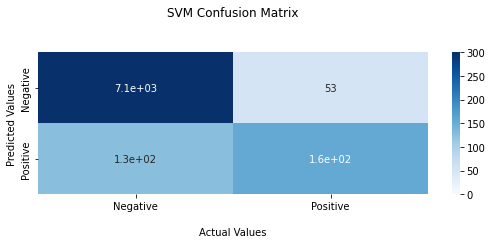

In [159]:
ax = sns.heatmap(cm_real, annot=True, cmap="Blues", vmin=0, vmax=300)

ax.set_title('SVM Confusion Matrix\n\n');
ax.set_xlabel('\nActual Values')
ax.set_ylabel('Predicted Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])


plt.show()

In [88]:
final_bench_results.loc[len(final_bench_results.index)] = ["SVM",mcct,acct,prect,rect,f1t]
final_bench_results

,Method,Mcc,Accuracy,Precision,Recall,F1 score
0,VonHeijne,0.581546,0.970091,0.478395,0.741627,0.581614
1,SVM,0.628421,0.975724,0.549296,0.746411,0.632860


In [89]:
#sv = model.support_vectors_
#print model.n_support_
#y_pred = model.predict(X_test)
#DF = model.decision_function(X_test)


# Performances

In [90]:
final_cv_results.set_index("Method",inplace=True)
final_cv_results.index.name = None
final_cv_results = final_cv_results.style.set_caption("Cross Validation Performance Metrics")
final_cv_results = final_cv_results.set_table_styles([dict(selector = 'th', props=[('text-align', 'left')])])
final_cv_results

,MCC,Accuracy,Precision,Recall,F1 score
VonHeijne,0.784 +/- 0.011,0.945 +/- 0.004,0.872 +/- 0.011,0.874 +/- 0.009,0.873 +/- 0.004
SVM,0.862 +/- 0.008,0.965 +/- 0.002,0.901 +/- 0.016,0.864 +/- 0.008,0.882 +/- 0.006


In [91]:
final_bench_results.set_index("Method",inplace=True)
final_bench_results.index.name = None
final_bench_results = final_bench_results.style.set_caption("Benchmark Performance Metrics")
final_bench_results = final_bench_results.set_table_styles([dict(selector = 'th', props=[('text-align', 'left')])])
final_bench_results

,Mcc,Accuracy,Precision,Recall,F1 score
VonHeijne,0.581546,0.970091,0.478395,0.741627,0.581614
SVM,0.628421,0.975724,0.549296,0.746411,0.632860


In [92]:
final_cv_results.to_excel("CV_results.xlsx")
final_bench_results.to_excel("Bench_results.xlsx")

# Wrong predictions analysis

## False positives
Compute:
- false positive rate (FPR = FP/(FP+TN))
- Some of the predicted positives have a transmembrane alfa-helix in the first 50 residues. Check if the false positives are related to this feature. To do so compute FP with tm/ the overall number of transmembrane proteins having an alfa helix (among all the negatives).
- Extract also information about the presence of mithocondrial/ chloroplastic and peroxisomal transit peptides, and compute again the rate between the FP having those and the full number of negatives having that. We will get 4 rates, one per organell plus a total one.

Produce a list of the negatives ID.

Put them on uniprot ID mapping, and select transit peptide is in the PTM slide and the transmembrane is in the subcellular localization slide.

Download the table and parse it.


Or do it progammatically

### Data prep

In [93]:
import requests

In [94]:
test_full = pd.read_table("benchmark.tsv")

test.head()

,UniProtKB accession,Taxa,Kingdom,Class,Sequence (first 50 N-terminal residues),SP cleavage-site annotation,Predicted
0,Q8TF40,Homo sapiens (Human),Metazoa,0,MAPTLFQKLFSKRTGLGAPGRDARDPDCGFSWPLPEFDPSQIRLIV...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
1,Q1ENB6,Arabidopsis thaliana (Mouse-ear cress),Plants,0,MDFTSLETTTFEEVVIALGSNVGNRMNNFKEALRLMKDYGISVTRH...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
2,Q9BZS1,Homo sapiens (Human),Metazoa,0,MPNPRPGKPSAPSLALGPSPGASPSWRAAPKASDLLGARGPGGTFQ...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
3,F4K2A1,Arabidopsis thaliana (Mouse-ear cress),Plants,0,MFAVSIVPRTTSCRLSSAFLCQLSIPLTLRLHHHYQHHQPHLPSPL...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
4,Q9SZL8,Arabidopsis thaliana (Mouse-ear cress),Plants,0,MMDNEVLDFDIGVGVSSGGDVDDDAIDIEHHALDDDDMLDSPIMPC...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0


In [95]:
negatives = test_full[test_full["Class"]== "NO_SP"]
negatives = negatives["UniProtKB accession"]

In [96]:
negatives = negatives.values

In [97]:
negatives

array(['Q8TF40', 'Q1ENB6', 'Q9BZS1', ..., 'Q93Y07', 'Q86TL2', 'E2JF22'],
      dtype=object)

In [98]:
test_results.head()  #vonhejne

,Uniprot ID,Sequence,Signal Peptide,Score,Real Class,Cross-validation fold,Predicted Class
0,Q8TF40,MAPTLFQKLFSKRTGLGAPGRDARDPDCGFSWPLPEFDPSQIRLIV...,FSWPLPEFDPSQIRL,-0.725573,0,0.0,0
1,Q1ENB6,MDFTSLETTTFEEVVIALGSNVGNRMNNFKEALRLMKDYGISVTRH...,VVIALGSNVGNRMNN,-3.368714,0,0.0,0
2,Q9BZS1,MPNPRPGKPSAPSLALGPSPGASPSWRAAPKASDLLGARGPGGTFQ...,APSLALGPSPGASPS,4.549301,0,0.0,0
3,F4K2A1,MFAVSIVPRTTSCRLSSAFLCQLSIPLTLRLHHHYQHHQPHLPSPL...,RLSSAFLCQLSIPLT,3.632633,0,0.0,0
4,Q9SZL8,MMDNEVLDFDIGVGVSSGGDVDDDAIDIEHHALDDDDMLDSPIMPC...,VLDFDIGVGVSSGGD,1.210233,0,0.0,0


In [99]:
false_positives_VH = test_results.loc[test_results['Real Class'] == 0]
false_positives_VH =false_positives_VH.loc[false_positives_VH['Predicted Class'] == 1]

In [100]:
false_positives_VH = false_positives_VH["Uniprot ID"].values

In [101]:
false_positives_VH[:5]

array(['Q0VGT2', 'Q9VD44', 'Q9LU39', 'P36970', 'F4KDN0'], dtype=object)

In [102]:
false_positives_SVM = test.loc[test['Class'] == 0]
false_positives_SVM =false_positives_SVM.loc[false_positives_SVM['Predicted'] == 1]
false_positives_SVM = false_positives_SVM["UniProtKB accession"].values

In [103]:
len(false_positives_SVM)

128

### Signal retrieval

In [104]:
import re
import time
import json
import zlib
from xml.etree import ElementTree
from urllib.parse import urlparse, parse_qs, urlencode
import requests
from requests.adapters import HTTPAdapter, Retry


POLLING_INTERVAL = 3
API_URL = "https://rest.uniprot.org"


retries = Retry(total=5, backoff_factor=0.25, status_forcelist=[500, 502, 503, 504])
session = requests.Session()
session.mount("https://", HTTPAdapter(max_retries=retries))

In [105]:
def check_response(response):
    try:
        response.raise_for_status()
    except requests.HTTPError:
        print(response.json())
        raise


def submit_id_mapping(from_db, to_db, ids):
    request = requests.post(
        f"{API_URL}/idmapping/run",
        data={"from": from_db, "to": to_db, "ids": ",".join(ids)},
    )
    check_response(request)
    return request.json()["jobId"]


def get_next_link(headers):
    re_next_link = re.compile(r'<(.+)>; rel="next"')
    if "Link" in headers:
        match = re_next_link.match(headers["Link"])
        if match:
            return match.group(1)


def check_id_mapping_results_ready(job_id):
    while True:
        request = session.get(f"{API_URL}/idmapping/status/{job_id}")
        check_response(request)
        j = request.json()
        if "jobStatus" in j:
            if j["jobStatus"] == "RUNNING":
                print(f"Retrying in {POLLING_INTERVAL}s")
                time.sleep(POLLING_INTERVAL)
            else:
                raise Exception(j["jobStatus"])
        else:
            return bool(j["results"] or j["failedIds"])


def get_batch(batch_response, file_format, compressed):
    batch_url = get_next_link(batch_response.headers)
    while batch_url:
        batch_response = session.get(batch_url)
        batch_response.raise_for_status()
        yield decode_results(batch_response, file_format, compressed)
        batch_url = get_next_link(batch_response.headers)


def combine_batches(all_results, batch_results, file_format):
    if file_format == "json":
        for key in ("results", "failedIds"):
            if key in batch_results and batch_results[key]:
                all_results[key] += batch_results[key]
    elif file_format == "tsv":
        return all_results + batch_results[1:]
    else:
        return all_results + batch_results
    return all_results


def get_id_mapping_results_link(job_id):
    url = f"{API_URL}/idmapping/details/{job_id}"
    request = session.get(url)
    check_response(request)
    return request.json()["redirectURL"]


def decode_results(response, file_format, compressed):
    if compressed:
        decompressed = zlib.decompress(response.content, 16 + zlib.MAX_WBITS)
        if file_format == "json":
            j = json.loads(decompressed.decode("utf-8"))
            return j
        elif file_format == "tsv":
            return [line for line in decompressed.decode("utf-8").split("\n") if line]
        elif file_format == "xlsx":
            return [decompressed]
        elif file_format == "xml":
            return [decompressed.decode("utf-8")]
        else:
            return decompressed.decode("utf-8")
    elif file_format == "json":
        return response.json()
    elif file_format == "tsv":
        return [line for line in response.text.split("\n") if line]
    elif file_format == "xlsx":
        return [response.content]
    elif file_format == "xml":
        return [response.text]
    return response.text


def get_xml_namespace(element):
    m = re.match(r"\{(.*)\}", element.tag)
    return m.groups()[0] if m else ""


def merge_xml_results(xml_results):
    merged_root = ElementTree.fromstring(xml_results[0])
    for result in xml_results[1:]:
        root = ElementTree.fromstring(result)
        for child in root.findall("{http://uniprot.org/uniprot}entry"):
            merged_root.insert(-1, child)
    ElementTree.register_namespace("", get_xml_namespace(merged_root[0]))
    return ElementTree.tostring(merged_root, encoding="utf-8", xml_declaration=True)


def print_progress_batches(batch_index, size, total):
    n_fetched = min((batch_index + 1) * size, total)
    print(f"Fetched: {n_fetched} / {total}")


def get_id_mapping_results_search(url):
    parsed = urlparse(url)
    query = parse_qs(parsed.query)
    file_format = query["format"][0] if "format" in query else "json"
    if "size" in query:
        size = int(query["size"][0])
    else:
        size = 500
        query["size"] = size
    compressed = (
        query["compressed"][0].lower() == "true" if "compressed" in query else False
    )
    parsed = parsed._replace(query=urlencode(query, doseq=True))
    url = parsed.geturl()
    request = session.get(url)
    check_response(request)
    results = decode_results(request, file_format, compressed)
    total = int(request.headers["x-total-results"])
    print_progress_batches(0, size, total)
    for i, batch in enumerate(get_batch(request, file_format, compressed), 1):
        results = combine_batches(results, batch, file_format)
        print_progress_batches(i, size, total)
    if file_format == "xml":
        return merge_xml_results(results)
    return results


def get_id_mapping_results_stream(url):
    if "/stream/" not in url:
        url = url.replace("/results/", "/results/stream/")
    request = session.get(url)
    check_response(request)
    parsed = urlparse(url)
    query = parse_qs(parsed.query)
    file_format = query["format"][0] if "format" in query else "json"
    compressed = (
        query["compressed"][0].lower() == "true" if "compressed" in query else False
    )
    return decode_results(request, file_format, compressed)

In [106]:
job_id = submit_id_mapping(
    from_db="UniProtKB_AC-ID", to_db="UniProtKB", ids=["Q9BVX2"]
)
if check_id_mapping_results_ready(job_id):
    link = get_id_mapping_results_link(job_id)
    results = get_id_mapping_results_search(link)
    # Equivalently using the stream endpoint which is more demanding
    # on the API and so is less stable:
    # results = get_id_mapping_results_stream(link)

res = results['results']
# {'results':\ [{'from': 'P05067', 'to': 'CHEMBL2487'}], 'failedIds': ['P12345']}

Fetched: 1 / 1


In [107]:
res[0]["to"].keys()

dict_keys(['entryType', 'primaryAccession', 'secondaryAccessions', 'uniProtkbId', 'entryAudit', 'annotationScore', 'organism', 'proteinExistence', 'proteinDescription', 'genes', 'comments', 'features', 'keywords', 'references', 'uniProtKBCrossReferences', 'sequence', 'extraAttributes'])

In [108]:
res[0]["to"]["features"][0]["evidences"][0]["evidenceCode"]

'ECO:0000269'

In [109]:
def json_parser(IDs):

    alphaH = 0      #alpha helix
    TPT = 0         #Transit peptides (total)
    transits_loc = [0,0,0]   #0 for mithocondrion, 1 for Chloroplast, 2 for Peroxosome

    #Download the json dictionary for each protein ID
    job_id = submit_id_mapping(
    from_db="UniProtKB_AC-ID", to_db="UniProtKB", ids=IDs
    )
    if check_id_mapping_results_ready(job_id):
        link = get_id_mapping_results_link(job_id)
        results = get_id_mapping_results_search(link)
        # Equivalently using the stream endpoint which is more demanding
        # on the API and so is less stable:
        # results = get_id_mapping_results_stream(link)

    eco_codes = ["ECO:0000269"," ECO:0000303","ECO:0000305"," ECO:0000250","ECO:0000255","ECO:0000312","ECO:0007744"]
    res = results['results']
    for protein in res:
          #Check for transit peptides
          if protein["to"].get("features") is None: continue
          for feat in protein["to"]["features"]:
              if feat["type"] == "Transit peptide":
                  if feat.get("evidences") is not None: 
                      for eco in feat["evidences"]:
                          if eco.get("evidenceCode") is not None:
                              if eco["evidenceCode"] in eco_codes:
                                  TPT += 1
                                  skip = "add"
                              else:
                                  skip = "pass"


                  #Check for tp to specific locations
                  for i,loc in enumerate(["Mitochondrion","Chloroplast","Peroxisome"]):
                      if loc in feat["description"]  and skip == "add":
                          transits_loc[i] += 1
                          break
                      elif feat["description"] == "Chloroplast and mitochondrion" and skip == "add":
                          transits_loc[0] += 1
                          transits_loc[1] += 1
                          break

              #Check for Transmembrane domains within the first 50 residues
              if feat.get("location") is None: continue            
              if feat["type"] == "Transmembrane":
                  if int(feat['location']["end"]["value"]) <= 50:
                      if feat.get("evidences") is not None: 
                          for eco in feat["evidences"]:
                              if eco.get("evidenceCode") is not None:
                                  if eco["evidenceCode"] in eco_codes:
                                      alphaH += 1
        
    return [alphaH,TPT,transits_loc[0],transits_loc[1],transits_loc[2]]

In [110]:
results = json_parser(negatives)
results

Fetched: 500 / 7248
Fetched: 1000 / 7248
Fetched: 1500 / 7248
Fetched: 2000 / 7248
Fetched: 2500 / 7248
Fetched: 3000 / 7248
Fetched: 3500 / 7248
Fetched: 4000 / 7248
Fetched: 4500 / 7248
Fetched: 5000 / 7248
Fetched: 5500 / 7248
Fetched: 6000 / 7248
Fetched: 6500 / 7248
Fetched: 7000 / 7248
Fetched: 7248 / 7248


[148, 1393, 756, 624, 5]

In [111]:
results_FP_VH = json_parser(false_positives_VH)
results_FP_VH

Fetched: 169 / 169


[44, 49, 25, 25, 0]

In [112]:
results_FP_SVM = json_parser(false_positives_SVM)
results_FP_SVM

Fetched: 128 / 128


[45, 42, 35, 8, 0]

### Rates computation

In [113]:
results = np.array(results)
results_FP_VH = np.array(results_FP_VH)
results_FP_SVM = np.array(results_FP_SVM)

In [114]:
#Legenda:
#vh = VonHejne   ; svm = Support Vector Machine
#tm = Transmembrane ;   tp = transit peptides ; tpm = transit mithocondrion ; tpc = transit Chloroplast ; tpp = transit peroxisome

tm_vh,tp_vh,tpm_vh,tpc_vh,tpp_vh = results_FP_VH/ results
tm_svm,tp_svm,tpm_svm,tpc_svm,tpp_svm = results_FP_SVM/ results

In [115]:
#FP/(FP+TN)
TN = len(negatives)
FP_VH = len(false_positives_VH)
FP_SVM = len(false_positives_SVM)
FPR_VH = FP_VH/TN
FPR_SVM = FP_SVM/TN

In [116]:
print(FPR_VH,tm_vh,tp_vh,tpm_vh,tpc_vh,tpp_vh) 

0.023319994480474678 0.2972972972972973 0.035175879396984924 0.03306878306878307 0.04006410256410257 0.0


In [117]:
print(FPR_SVM,tm_svm,tp_svm,tpm_svm,tpc_svm,tpp_svm)

0.017662481026631708 0.30405405405405406 0.03015075376884422 0.046296296296296294 0.01282051282051282 0.0


In [118]:
table_rates = pd.DataFrame(columns=["FPR","Transmembrane FPR","Transit Peptides FPR","Mithocondrion FPR","Chloroplast FPR","Peroxisome FPR"],index=["VonHejne","SVM"])
table_rates.loc["VonHejne"] = [FPR_VH,tm_vh,tp_vh,tpm_vh,tpc_vh,tpp_vh]
table_rates.loc["SVM"] = [FPR_SVM,tm_svm,tp_svm,tpm_svm,tpc_svm,tpp_svm]
table_rates

,FPR,Transmembrane FPR,Transit Peptides FPR,Mithocondrion FPR,Chloroplast FPR,Peroxisome FPR
VonHejne,0.02332,0.297297,0.035176,0.033069,0.040064,0.0
SVM,0.017662,0.304054,0.030151,0.046296,0.012821,0.0


In [119]:
table_rates = table_rates.style.set_caption("False Positive Rates Comparison")
table_rates = table_rates.set_table_styles([dict(selector = 'th', props=[('text-align', 'left')])])
table_rates

,FPR,Transmembrane FPR,Transit Peptides FPR,Mithocondrion FPR,Chloroplast FPR,Peroxisome FPR
VonHejne,0.023320,0.297297,0.035176,0.033069,0.040064,0.000000
SVM,0.017662,0.304054,0.030151,0.046296,0.012821,0.000000


In [120]:
table_rates.to_excel("FPR.xlsx")

## False negatives
Check for the algorithms assumptions:
- Von Heijne method -> SP is around cleavage site; Collect FN and compute a logo(-13;+2) and compare with TP logo: in principle, the TP logo should be more similar to original set logo, while in FN logo we should see something missing.
This allows to highlight a possibly different composition of the the False Negatives set, thus informing us that composition can't be assumed.

- Support Vector Machines -> analyze length distribution with k length, and same for composition

Since the composition of the signal may differ according to source organism, the model may become specific for a given kingdom.
To check for that: analyze the False Negatives abundances on the different kingdoms.

### VonHejne

Compare (for signal peptides) the Logo of the false negatives benchamrk, the logo of the true positives benchmark, and the logo of the training set.

#### Logo for true positives

In [121]:
positives = test_results[test_results["Real Class"] == 1]

In [122]:
positives.shape

(209, 7)

In [123]:
sp_positives = positives["Signal Peptide"]

In [124]:
with open("true_positives_sp.txt","w") as seqfile:
    seqfile.write('\n'.join(sp_positives))

#### Logo for false negatives

In [125]:
false_neg_VH =positives.loc[positives['Predicted Class'] == 0]

In [126]:
false_neg_VH.shape

(54, 7)

In [127]:
fn_sp = false_neg_VH["Signal Peptide"]

In [128]:
with open("false_negatives_sp.txt","w") as seqfile:
    seqfile.write('\n'.join(fn_sp))

#### Logo comparison

False negatives:

![image.png](https://weblogo.berkeley.edu/cache/fileKgsUIC.png)

True positives:

![image.png](https://weblogo.berkeley.edu/cache/fileMOki0c.png)

Training set:

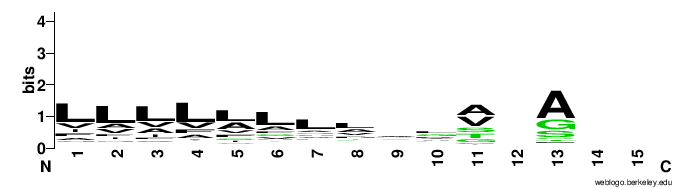

Training set is way more similar to the true positives in respect to the false negatives. This justify the classification error made by the model, since it is caused by a different composition.

### SVM

Compute the composition distribution (istogram, box plot) of the 1st k residues for the false negatives, and for the true positives. Do the same for the training set, using the same k.

Then compute the lenght distributions for the false negatives and true positives and compare it to the one on the training set.

#### Amminoacid composition

In [129]:
positives = test.loc[test["Class"] == 1]
positives.shape

(209, 7)

In [130]:
false_negatives = positives.loc[positives["Predicted"] == 0]

In [131]:
false_negatives.shape

(53, 7)

In [132]:
positives_training = data.loc[data["Class"] == 1]

In [133]:
positives_training.shape

(258, 7)

In [134]:
#i build a dictionary storing the frequences of the amminoacids in the signal peptides dataset

def compute_freq(df,K,n):
    sp_freq_tr = {}
    for seq in df["Sequence (first 50 N-terminal residues)"]:
        for aa in seq[:K+1]:
            if aa in sp_freq_tr:
                sp_freq_tr[aa] += 100/(n*len(seq[:K+1]))
            else: 
                sp_freq_tr[aa] = 0
    return sp_freq_tr

In [135]:
pos_freq = compute_freq(positives,19,len(positives))
fn_freq = compute_freq(false_negatives,19,len(false_negatives))
training_freq = compute_freq(positives_training,19,len(positives_training))

In [136]:
#Then i create a dataframe with it
TP_freq_df = pd.DataFrame.from_dict(pos_freq, orient="index")
TP_freq_df.columns = ["freq"]
TP_freq_df.reset_index(level=0,inplace=True)
TP_freq_df['index'] = pd.Categorical(TP_freq_df['index'], ["G","A","V","P","L","I","M","F","W","Y","S","T","C","N","Q","H","D","E","K","R"])
TP_freq_df.sort_values("index",inplace=True)
TP_freq_df["freq"] =TP_freq_df["freq"]
TP_freq_df.columns = ["id","freq"]
TP_freq_df

,id,freq
9,G,5.382775
1,A,12.966507
8,V,8.181818
13,P,3.779904
5,L,21.100478
4,I,4.808612
0,M,6.842105
7,F,5.454545
14,W,2.081340
16,Y,1.076555


In [137]:
TP_freq_df["freq"].sum()

99.52153110047863

In [138]:
#Then i create a dataframe with it
FN_freq_df = pd.DataFrame.from_dict(fn_freq, orient="index")
FN_freq_df.columns = ["freq"]
FN_freq_df.reset_index(level=0,inplace=True)
FN_freq_df['index'] = pd.Categorical(FN_freq_df['index'], ["G","A","V","P","L","I","M","F","W","Y","S","T","C","N","Q","H","D","E","K","R"])
FN_freq_df.sort_values("index",inplace=True)
FN_freq_df["freq"] = FN_freq_df["freq"]
FN_freq_df.columns = ["id","freq"]
FN_freq_df

,id,freq
9,G,6.981132
1,A,13.207547
8,V,6.509434
11,P,6.226415
5,L,13.584906
4,I,4.245283
0,M,7.169811
7,F,4.528302
12,W,1.698113
14,Y,0.660377


In [139]:
FN_freq_df["freq"].sum()

98.11320754716992

In [140]:
#Then i create a dataframe with it
train_freq_df = pd.DataFrame.from_dict(training_freq, orient="index")
train_freq_df.columns = ["freq"]
train_freq_df.reset_index(level=0,inplace=True)
train_freq_df['index'] = pd.Categorical(train_freq_df['index'], ["G","A","V","P","L","I","M","F","W","Y","S","T","C","N","Q","H","D","E","K","R"])
train_freq_df.sort_values("index",inplace=True)
train_freq_df["freq"] = train_freq_df["freq"]
train_freq_df.columns = ["id","freq"]
train_freq_df

,id,freq
9,G,5.271318
4,A,12.073643
11,V,9.011628
13,P,3.313953
3,L,23.895349
12,I,4.399225
0,M,6.996124
2,F,5.542636
17,W,1.918605
16,Y,0.988372


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


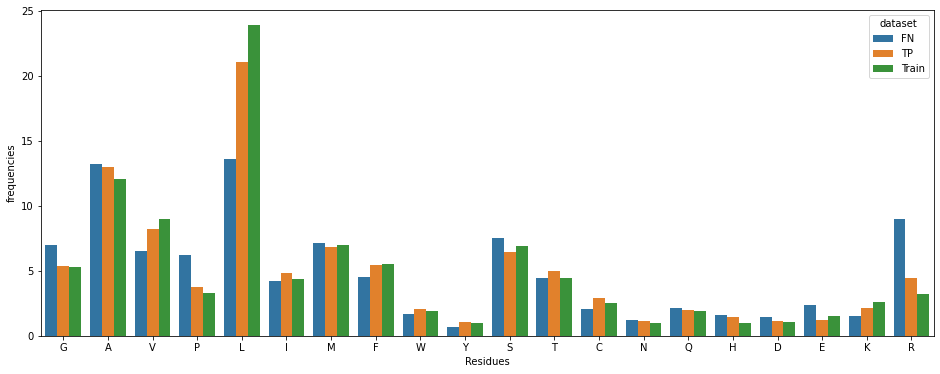

In [141]:
#FALSE NEGATIVES OF BENCHMARK SET (according to SVM prediction) VS TRUE POSITIVES OF BENCHMARK SET  VS TRUE POSITIVES OF TRAINING SET
plt.figure(figsize=(16,6))
merged = pd.merge(FN_freq_df, TP_freq_df, on='id')
merged = pd.merge(merged, train_freq_df, on='id')        
merged.rename(columns={'freq_x':'FN', 'freq_y':'TP', 'freq':'Train'}, inplace=True)
merged = merged[['id', 'FN', 'TP','Train']]
merged = merged.melt(id_vars=['id'], var_name='dataset', value_name='frequencies')
#merged.tail()

sns.barplot(merged['id'], y=merged['frequencies'], hue=merged['dataset'])
plt.xlabel("Residues")
plt.show()

#### Lenght distribution

In [142]:
def len_sp(df):
  '''This function takes a data frame storing only sequences with SP, and returns a list with all the lenghts of the respective SPs'''
  lenghts_tr = []
  for sp in df['SP cleavage-site annotation']:
      leng = 0
      for char in sp:
          if char == "S":
              leng += 1
      lenghts_tr.append(leng)
  return lenghts_tr

In [143]:
false_negatives_SP_lengths = len_sp(false_negatives)
positives_SP_lengths = len_sp(positives)
positives_training_SP_lenghts = len_sp(positives_training)

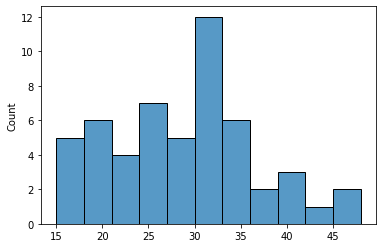

In [144]:
sns.histplot(false_negatives_SP_lengths, binwidth=3)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


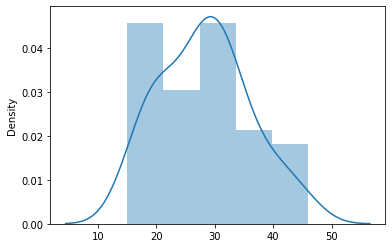

In [145]:
sns.distplot(false_negatives_SP_lengths)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


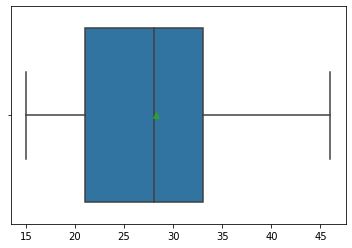

In [146]:
sns.boxplot(false_negatives_SP_lengths,showmeans=True)

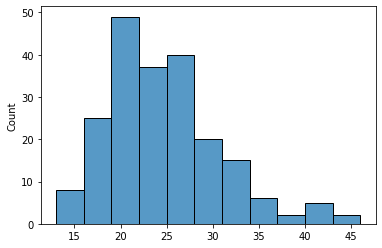

In [147]:
sns.histplot(positives_SP_lengths, binwidth=3)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


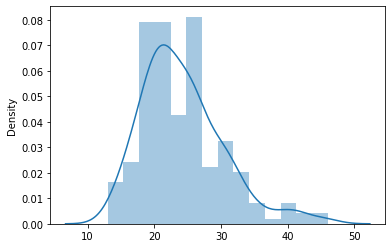

In [148]:
sns.distplot(positives_SP_lengths)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


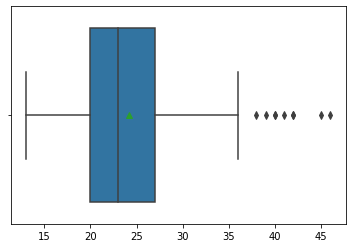

In [149]:
sns.boxplot(positives_SP_lengths,showmeans=True)

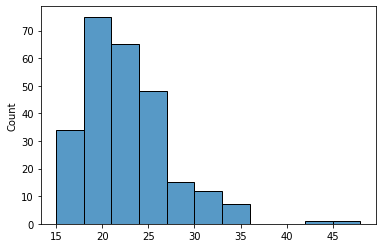

In [150]:
sns.histplot(positives_training_SP_lenghts, binwidth=3)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


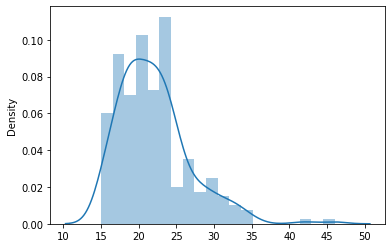

In [151]:
sns.distplot(positives_training_SP_lenghts)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


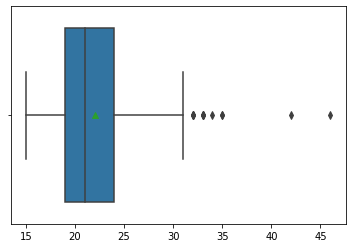

In [152]:
sns.boxplot(positives_training_SP_lenghts,showmeans=True)

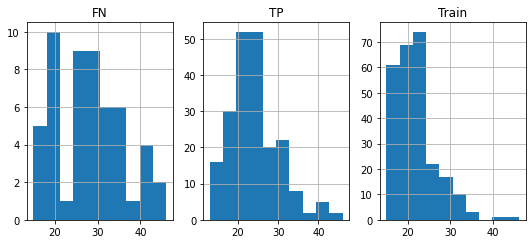

In [153]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

df1 = pd.DataFrame(dict(FN = false_negatives_SP_lengths))
df2 = pd.DataFrame(dict(TP = positives_SP_lengths))
df3 = pd.DataFrame(dict(Train = positives_training_SP_lenghts))

fig, axes = plt.subplots(1, 3)

df1.hist('FN', ax=axes[0])
df2.hist('TP', ax=axes[1])
df3.hist('Train', ax=axes[2])

plt.show()

###False negatives kingdom distribution

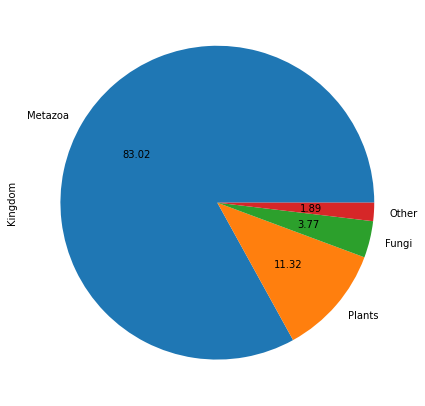

In [154]:
FN_kingdoms = false_negatives["Kingdom"].value_counts()
plot = FN_kingdoms.plot.pie(figsize=(6, 6), autopct="%.2f")

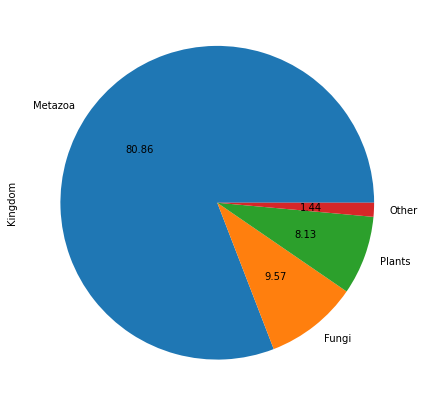

In [155]:
TP_kingdoms = positives["Kingdom"].value_counts()
plot = TP_kingdoms.plot.pie(figsize=(6, 6), autopct="%.2f")

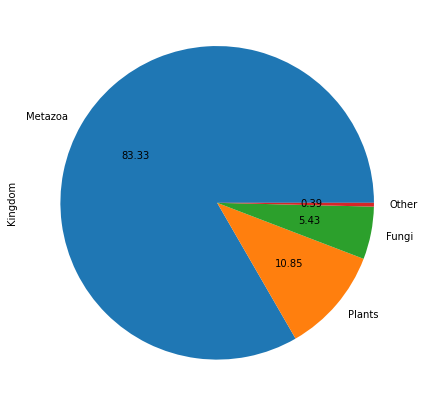

In [156]:
Train_kingdoms = positives_training["Kingdom"].value_counts()
plot = Train_kingdoms.plot.pie(figsize=(6, 6), autopct="%.2f")